In [1]:
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
file_path = 'market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'], header=0)
# 상한가 설정
bitcoin_df['cap'] = 20000
# 하한가 설정 
# bitcoin_df['floor'] = 2000
# growth = logistic  상한설정시 추가, 비선형방식으로 분석
prophet = Prophet(seasonality_mode = 'multiplicative',
                  growth = 'logistic', # 상하한가 설정할때 , 비선형방식
                 yearly_seasonality = True, # 연별
                 weekly_seasonality = True, # 주별
                 daily_seasonality = True, # 일별
                 changepoint_prior_scale = 0.5) # 과적합 방지 0.5만큼 만 분석
prophet.fit(bitcoin_df) # 학습하기

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
bitcoin_df.head()

,ds,y,cap
0,2017-08-27 00:00:00,4354.308333,20000
1,2017-08-28 00:00:00,4391.673517,20000
2,2017-08-29 00:00:00,4607.985450,20000
3,2017-08-30 00:00:00,4594.987850,20000
4,2017-08-31 00:00:00,4748.255000,20000


In [1]:
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
file_path = 'market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'], header=0)
# 상한가 설정
bitcoin_df['cap'] = 20000
# 하한가 설정 
# bitcoin_df['floor'] = 2000
# growth = logistic  상한설정시 추가, 비선형방식으로 분석
prophet = Prophet(seasonality_mode = 'multiplicative',
                  growth = 'logistic', # 상하한가 설정할때 , 비선형방식
                 yearly_seasonality = True, # 연별
                 weekly_seasonality = True, # 주별
                 daily_seasonality = True, # 일별
                 changepoint_prior_scale = 0.5) # 과적합 방지 0.5만큼 만 분석
(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
)

In [3]:
# 5일 앞을 예측하기
future_data = prophet.make_future_dataframe(periods=5, freq='d')
# 상한가 설정
future_data['cap'] = 20000
# future_data['floor'] = 2000
# 예측
forecast_data = prophet.predict(future_data)
forecast_data



,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-08-27,5621.085431,20000,4008.821488,5757.019304,5621.085431,5621.085431,0.311474,0.311474,0.311474,...,0.002289,0.002289,0.002289,-0.440095,-0.440095,-0.440095,0.0,0.0,0.0,4910.962354
1,2017-08-28,5626.023045,20000,3955.585468,5723.896533,5626.023045,5626.023045,0.311474,0.311474,0.311474,...,-0.000562,-0.000562,-0.000562,-0.449330,-0.449330,-0.449330,0.0,0.0,0.0,4847.280361
2,2017-08-29,5630.963297,20000,3911.998721,5680.326522,5630.963297,5630.963297,0.311474,0.311474,0.311474,...,-0.000493,-0.000493,-0.000493,-0.459435,-0.459435,-0.459435,0.0,0.0,0.0,4795.023355
3,2017-08-30,5635.906186,20000,3875.520852,5590.533721,5635.906186,5635.906186,0.311474,0.311474,0.311474,...,-0.007356,-0.007356,-0.007356,-0.470318,-0.470318,-0.470318,0.0,0.0,0.0,4699.215406
4,2017-08-31,5640.851711,20000,3810.130956,5423.302109,5640.851711,5640.851711,0.311474,0.311474,0.311474,...,-0.005606,-0.005606,-0.005606,-0.481860,-0.481860,-0.481860,0.0,0.0,0.0,4648.105600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2018-08-27,7108.210766,20000,5313.384266,7048.183238,7108.210766,7108.210766,0.311474,0.311474,0.311474,...,-0.000562,-0.000562,-0.000562,-0.437930,-0.437930,-0.437930,0.0,0.0,0.0,6205.334670
366,2018-08-28,7111.966217,20000,5257.614559,7014.891617,7111.966217,7111.966217,0.311474,0.311474,0.311474,...,-0.000493,-0.000493,-0.000493,-0.446936,-0.446936,-0.446936,0.0,0.0,0.0,6145.052289
367,2018-08-29,7115.722558,20000,5183.980838,6862.843499,7115.722558,7115.722558,0.311474,0.311474,0.311474,...,-0.007356,-0.007356,-0.007356,-0.456831,-0.456831,-0.456831,0.0,0.0,0.0,6029.053882
368,2018-08-30,7119.479786,20000,5142.817816,6755.514784,7119.464525,7119.496318,0.311474,0.311474,0.311474,...,-0.005606,-0.005606,-0.005606,-0.467530,-0.467530,-0.467530,0.0,0.0,0.0,5968.527240


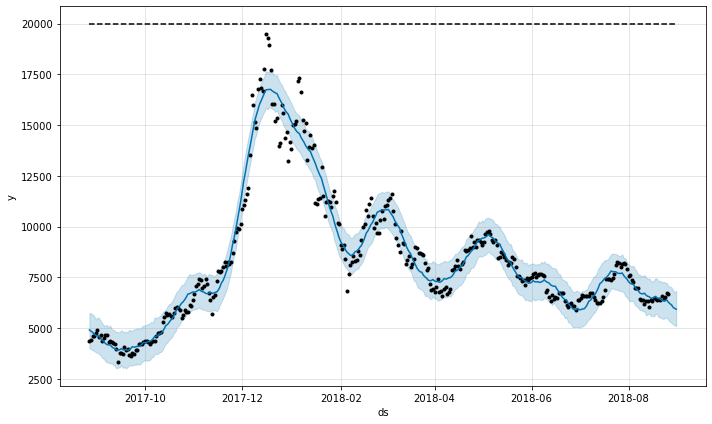

In [4]:
# 그래프로 작성
fig = prophet.plot(forecast_data)

In [13]:
# 실제 데이터와 비교하기
# 예측데이터
pred_y = forecast_data.yhat.values[-5:]
pred_y 

array([6205.33466998, 6145.05228906, 6029.05388165, 5968.52723998,
       5932.68137291])

In [11]:
# 실제데이터
test_file_path = 'market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds', 'y'], header=0)
test_y = bitcoin_test_df.y.values

In [14]:
# 예측최소데이터
pred_y_lower = forecast_data.yhat_lower.values[-5:]

In [15]:
# 예측최대데이터
pred_y_upper = forecast_data.yhat_upper.values[-5:]

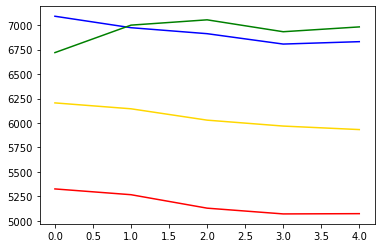

In [16]:
plt.plot(pred_y, color = 'gold') # 모델 예측한 가격그래프
plt.plot(pred_y_lower, color = 'red') # 모델이 예상한 최소 가격 그래프
plt.plot(pred_y_upper, color = 'blue') # 모델이 예상한 최대 가격 그래프
plt.plot(test_y, color = 'green') # 실제 가격 그래프

In [17]:
# 이상치 제거
bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'], header=0)
bitcoin_df.loc[bitcoin_df['y'] > 18000, 'y'] = None
bitcoin_df.info()
# 3건 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      365 non-null    object 
 1   y       362 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [18]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True, # 연별
                 weekly_seasonality = True, # 주별
                 daily_seasonality = True, # 일별
                 changepoint_prior_scale = 0.5) # 과적합 방지 0.5만큼 만 분석
prophet.fit(bitcoin_df) # 학습하기

In [19]:
# 5일 앞을 예측하기
future_data = prophet.make_future_dataframe(periods=5, freq='d')
# # 상한가 설정
# future_data['cap'] = 20000
# 예측
forecast_data = prophet.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-08-27,528.085585,3766.698129,5075.496722,528.085585,528.085585,9.711762,9.711762,9.711762,7.371717,...,-0.109233,-0.109233,-0.109233,-2.230812,-2.230812,-2.230812,0.0,0.0,0.0,4420.983246
1,2017-08-28,529.776373,3961.128742,5121.531273,529.776373,529.776373,9.711762,9.711762,9.711762,7.479669,...,-0.054572,-0.054572,-0.054572,-2.177521,-2.177521,-2.177521,0.0,0.0,0.0,4492.328178
2,2017-08-29,531.467162,3978.374754,5172.827221,531.467162,531.467162,9.711762,9.711762,9.711762,7.642893,...,0.067545,0.067545,0.067545,-2.136414,-2.136414,-2.136414,0.0,0.0,0.0,4593.413651
3,2017-08-30,533.157950,4013.934349,5196.960495,533.157950,533.157950,9.711762,9.711762,9.711762,7.611159,...,0.009555,0.009555,0.009555,-2.110158,-2.110158,-2.110158,0.0,0.0,0.0,4591.108025
4,2017-08-31,534.848738,4008.172911,5178.939144,534.848738,534.848738,9.711762,9.711762,9.711762,7.647029,...,0.036189,0.036189,0.036189,-2.100922,-2.100922,-2.100922,0.0,0.0,0.0,4624.852670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2018-08-27,818.078684,6243.626452,7506.907764,818.078684,818.078684,9.711762,9.711762,9.711762,7.411506,...,-0.054572,-0.054572,-0.054572,-2.245684,-2.245684,-2.245684,0.0,0.0,0.0,6881.273946
366,2018-08-28,822.999668,6453.325229,7704.060396,822.999668,822.999668,9.711762,9.711762,9.711762,7.589491,...,0.067545,0.067545,0.067545,-2.189816,-2.189816,-2.189816,0.0,0.0,0.0,7069.148295
367,2018-08-29,827.920652,6419.908313,7727.754695,825.682414,827.920652,9.711762,9.711762,9.711762,7.575922,...,0.009555,0.009555,0.009555,-2.145395,-2.145395,-2.145395,0.0,0.0,0.0,7100.183131
368,2018-08-30,832.841636,6536.153516,7786.172133,823.752948,834.318783,9.711762,9.711762,9.711762,7.632749,...,0.036189,0.036189,0.036189,-2.115202,-2.115202,-2.115202,0.0,0.0,0.0,7189.713129


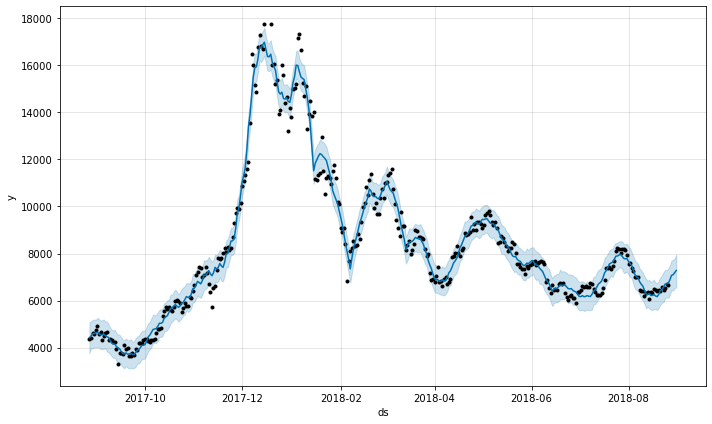

In [20]:
# 그래프로 작성
fig = prophet.plot(forecast_data)

In [21]:
# 실제 데이터와 비교하기
# 예측데이터
pred_y = forecast_data.yhat.values[-5:]
pred_y 

array([6881.2739463 , 7069.14829491, 7100.18313111, 7189.71312892,
       7278.54903332])

In [22]:
# 실제데이터
test_file_path = 'market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds', 'y'], header=0)
test_y = bitcoin_test_df.y.values

In [23]:
# 예측최소데이터
pred_y_lower = forecast_data.yhat_lower.values[-5:]

In [24]:
# 예측최대데이터
pred_y_upper = forecast_data.yhat_upper.values[-5:]

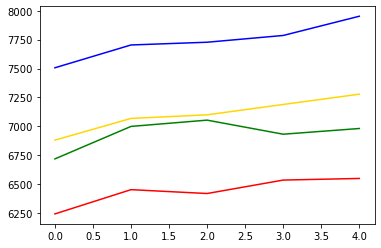

In [25]:
plt.plot(pred_y, color = 'gold') # 모델 예측한 가격그래프
plt.plot(pred_y_lower, color = 'red') # 모델이 예상한 최소 가격 그래프
plt.plot(pred_y_upper, color = 'blue') # 모델이 예상한 최대 가격 그래프
plt.plot(test_y, color = 'green') # 실제 가격 그래프

In [ ]:
# 지도학습은 정답이 있어서 비교할 수 잇음
이상치제거 등 판단이 가능함
# 회귀분석은 속성을 어떻게 집어넣는가로 갈림
# 가장좋은 것은 없다.

In [27]:
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
file_path = 'market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'], header=0)
# 상한가 설정
bitcoin_df['cap'] = 20000
# 하한가 설정 
bitcoin_df['floor'] = 2000
# growth = logistic  상한설정시 추가, 비선형방식으로 분석
prophet = Prophet(seasonality_mode = 'multiplicative',
                  growth = 'logistic', # 상하한가 설정할때 , 비선형방식
                 yearly_seasonality = True, # 연별
                 weekly_seasonality = True, # 주별
                 daily_seasonality = True, # 일별
                 changepoint_prior_scale = 0.5) # 과적합 방지 0.5만큼 만 분석
prophet.fit(bitcoin_df) # 학습하기

In [28]:
# 5일 앞을 예측하기
future_data = prophet.make_future_dataframe(periods=5, freq='d')
# 상한가 설정
future_data['cap'] = 20000
future_data['floor'] = 2000
# 예측
forecast_data = prophet.predict(future_data)
forecast_data


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-08-27,5703.063125,20000,2000,3715.115421,5497.027367,5703.063125,5703.063125,0.426516,0.426516,...,0.003555,0.003555,0.003555,-0.626876,-0.626876,-0.626876,0.0,0.0,0.0,4580.676685
1,2017-08-28,5708.250950,20000,2000,3665.713289,5396.548303,5708.250950,5708.250950,0.426516,0.426516,...,-0.000994,-0.000994,-0.000994,-0.642812,-0.642812,-0.642812,0.0,0.0,0.0,4467.904518
2,2017-08-29,5713.444155,20000,2000,3501.918583,5273.509727,5713.444155,5713.444155,0.426516,0.426516,...,-0.000734,-0.000734,-0.000734,-0.659989,-0.659989,-0.659989,0.0,0.0,0.0,4375.317434
3,2017-08-30,5718.642741,20000,2000,3377.490794,5126.427715,5718.642741,5718.642741,0.426516,0.426516,...,-0.010622,-0.010622,-0.010622,-0.678244,-0.678244,-0.678244,0.0,0.0,0.0,4218.353837
4,2017-08-31,5723.846707,20000,2000,3284.264456,5033.597019,5723.846707,5723.846707,0.426516,0.426516,...,-0.008040,-0.008040,-0.008040,-0.697376,-0.697376,-0.697376,0.0,0.0,0.0,4127.470590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2018-08-27,7102.808324,20000,2000,4866.755803,6547.711110,7102.808324,7102.808324,0.426516,0.426516,...,-0.000994,-0.000994,-0.000994,-0.623101,-0.623101,-0.623101,0.0,0.0,0.0,5699.443947
366,2018-08-28,7106.076367,20000,2000,4743.519630,6436.151223,7106.076367,7106.076367,0.426516,0.426516,...,-0.000734,-0.000734,-0.000734,-0.638706,-0.638706,-0.638706,0.0,0.0,0.0,5593.025888
367,2018-08-29,7109.345673,20000,2000,4533.463676,6332.987745,7109.336045,7109.345673,0.426516,0.426516,...,-0.010622,-0.010622,-0.010622,-0.655587,-0.655587,-0.655587,0.0,0.0,0.0,5405.285348
368,2018-08-30,7112.616243,20000,2000,4408.976493,6155.807154,7112.547092,7112.630877,0.426516,0.426516,...,-0.008040,-0.008040,-0.008040,-0.673590,-0.673590,-0.673590,0.0,0.0,0.0,5298.091380


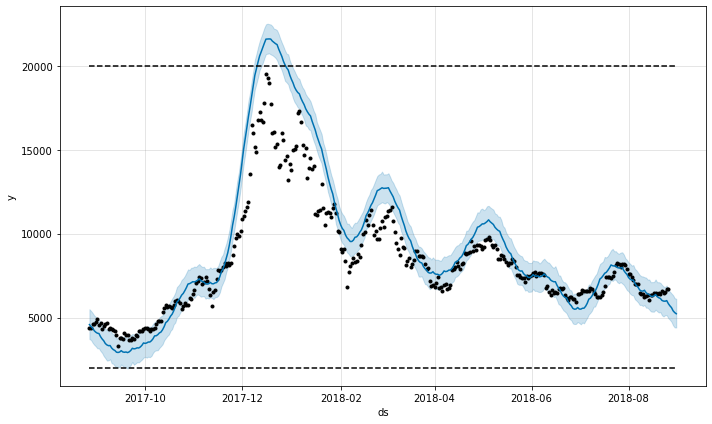

In [30]:
# 그래프로 작성
fig = prophet.plot(forecast_data)

In [31]:
# 실제 데이터와 비교하기
# 예측데이터
pred_y = forecast_data.yhat.values[-5:]
pred_y 

array([5699.44394662, 5593.02588819, 5405.28534766, 5298.09137955,
       5225.79678411])

In [32]:
# 실제데이터
test_file_path = 'market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds', 'y'], header=0)
test_y = bitcoin_test_df.y.values

In [33]:
# 예측최소데이터
pred_y_lower = forecast_data.yhat_lower.values[-5:]

In [34]:
# 예측최대데이터
pred_y_upper = forecast_data.yhat_upper.values[-5:]

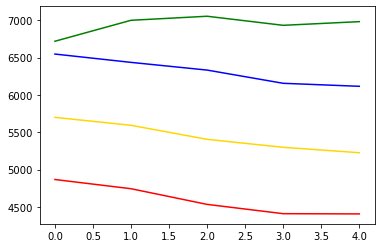

In [35]:
plt.plot(pred_y, color = 'gold') # 모델 예측한 가격그래프
plt.plot(pred_y_lower, color = 'red') # 모델이 예상한 최소 가격 그래프
plt.plot(pred_y_upper, color = 'blue') # 모델이 예상한 최대 가격 그래프
plt.plot(test_y, color = 'green') # 실제 가격 그래프

In [ ]:
# 보스턴 주택가격정보
# http://lib.stat.cmu.edu/datasets/boston_correted.txt
BostonHousing2.csv    

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
housing = pd.read_csv('BostonHousing2.csv')
housing.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [53]:
housing = housing.rename(columns = {'CMEDV':'y'})
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   y        506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


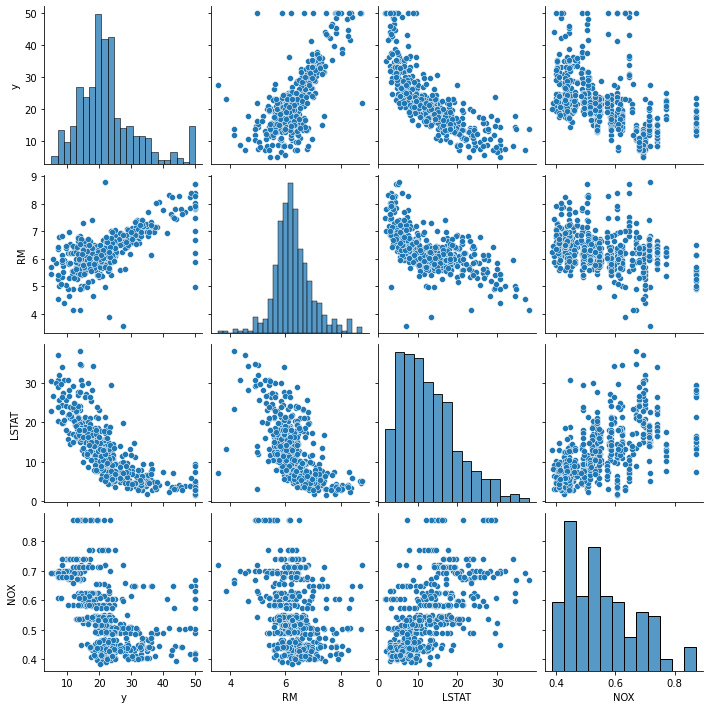

In [49]:
import seaborn as sns
cols = ['y','RM','LSTAT','NOX']
sns.pairplot( housing[cols])
plt.show()
# y, RM 양의 상관관계, LSTAT, NOX 음의 상관관계

In [50]:
# 독립속성, 종속속성 선택
y = housing['y']

In [55]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
#1 독립속성 선택
x = housing[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
             'DIS','RAD','TAX','PTRATIO','B','LSTAT']]
# 2 종속속성 선택
y = housing['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)


In [56]:
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7490284664199387
0.7009342135321538


In [57]:
print(lr.coef_)

[-1.11193551e-01  5.09415195e-02  3.25436161e-02  3.02115825e+00
 -1.54108556e+01  4.04590890e+00 -1.97595267e-03 -1.56114408e+00
  3.27038718e-01 -1.38825230e-02 -8.22151628e-01  8.74659468e-03
 -5.85060261e-01]


In [61]:
y_pred = lr.predict(x_train)
rmse = sqrt(mean_squared_error(y_train, y_pred))
print(rmse)

4.672162734008588


In [ ]:
# 상하한가 가능하면 해줌 
5000넣으면 무시하고 7000으로 나옴